In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
df = pd.read_csv('Student_Performance.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())

Dataset shape: (10000, 6)

First few rows:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Basic statistics:
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900   

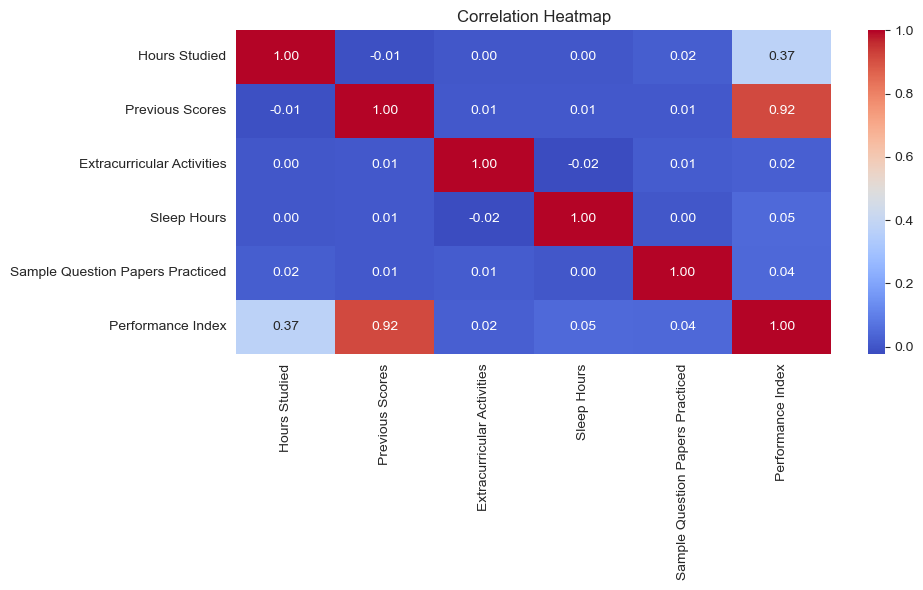

In [6]:
# Correlation heatmap
df_temp = df.copy()
df_temp['Extracurricular Activities'] = df_temp['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
plt.figure(figsize=(10, 6))
sns.heatmap(df_temp.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

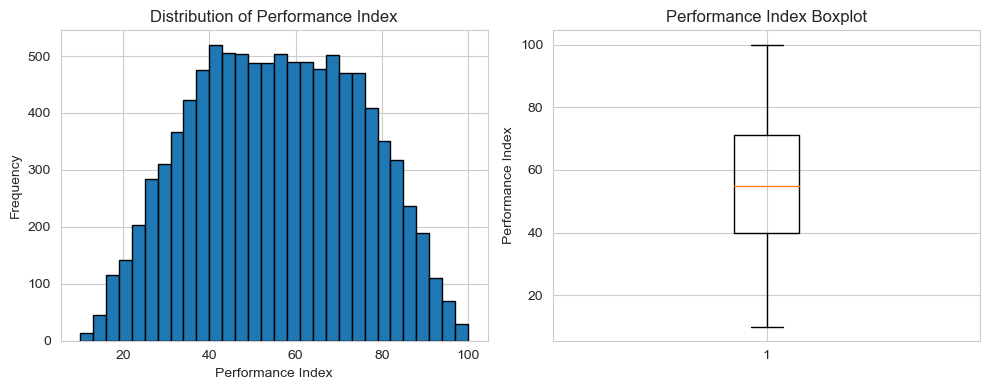

In [7]:
# Distribution of target variable
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Performance Index'], bins=30, edgecolor='black')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')
plt.title('Distribution of Performance Index')

plt.subplot(1, 2, 2)
plt.boxplot(df['Performance Index'])
plt.ylabel('Performance Index')
plt.title('Performance Index Boxplot')
plt.tight_layout()
plt.show()

# EXPERIMENT 1: BASELINE LINEAR REGRESSION


In [9]:
# Encode categorical variable
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

# Prepare features and target
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
        'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [11]:
# Make predictions
y_pred1 = model1.predict(X_test)


In [12]:
# Evaluate
r2_1 = r2_score(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))
mae_1 = mean_absolute_error(y_test, y_pred1)

print(f"\nR² Score: {r2_1:.4f}")
print(f"RMSE: {rmse_1:.4f}")
print(f"MAE: {mae_1:.4f}")


R² Score: 0.9890
RMSE: 2.0206
MAE: 1.6111


In [13]:
# Show feature importance
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, model1.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model1.intercept_:.4f}")


Feature Coefficients:
Hours Studied: 2.8525
Previous Scores: 1.0170
Extracurricular Activities: 0.6086
Sleep Hours: 0.4769
Sample Question Papers Practiced: 0.1918
Intercept: -33.9219


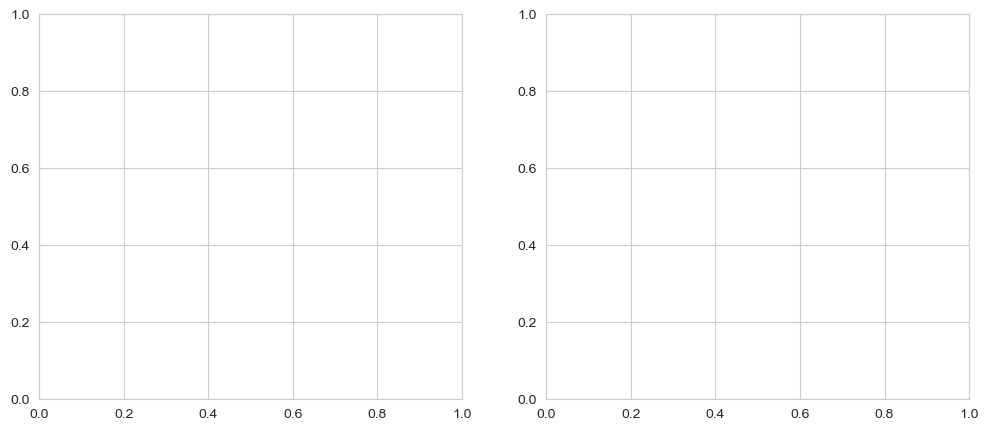

In [14]:
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

In [16]:
# Actual vs Predicted
axes[0].scatter(y_test, y_pred1, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Performance Index')
axes[0].set_ylabel('Predicted Performance Index')
axes[0].set_title('Experiment 1: Actual vs Predicted')

# Residuals
residuals1 = y_test - y_pred1
axes[1].scatter(y_pred1, residuals1, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Performance Index')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Experiment 1: Residual Plot')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

## EXPERIMENT 2: FEATURE ENGINEERING


In [38]:
# Create new features
df['Study_Efficiency'] = df['Hours Studied'] * df['Previous Scores']
df['Rest_Study_Ratio'] = df['Sleep Hours'] / (df['Hours Studied'] + 1)
df['Total_Preparation'] = df['Hours Studied'] + df['Sample Question Papers Practiced']
df['Study_Squared'] = df['Hours Studied'] ** 2
df['Previous_Scores_Squared'] = df['Previous Scores'] ** 2

# New feature set
X2 = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 
         'Sleep Hours', 'Sample Question Papers Practiced',
         'Study_Efficiency', 'Rest_Study_Ratio', 'Total_Preparation',
         'Study_Squared', 'Previous_Scores_Squared']]

In [39]:
# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [40]:
# Train model
model2 = LinearRegression()
model2.fit(X2_train_scaled, y2_train)

# Predictions
y_pred2 = model2.predict(X2_test_scaled)

In [41]:
# Evaluate
r2_2 = r2_score(y2_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y2_test, y_pred2))
mae_2 = mean_absolute_error(y2_test, y_pred2)

print(f"\nR² Score: {r2_2:.4f}")
print(f"RMSE: {rmse_2:.4f}")
print(f"MAE: {mae_2:.4f}")


R² Score: 0.9890
RMSE: 2.0201
MAE: 1.6107


In [22]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X2.columns,
    'Coefficient': model2.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 5 Most Important Features:")
print(feature_importance.head())


Top 5 Most Important Features:
                            Feature   Coefficient
7                 Total_Preparation -2.314370e+11
4  Sample Question Papers Practiced  1.702386e+11
0                     Hours Studied  1.543895e+11
1                   Previous Scores  1.788835e+01
3                       Sleep Hours  8.169126e-01


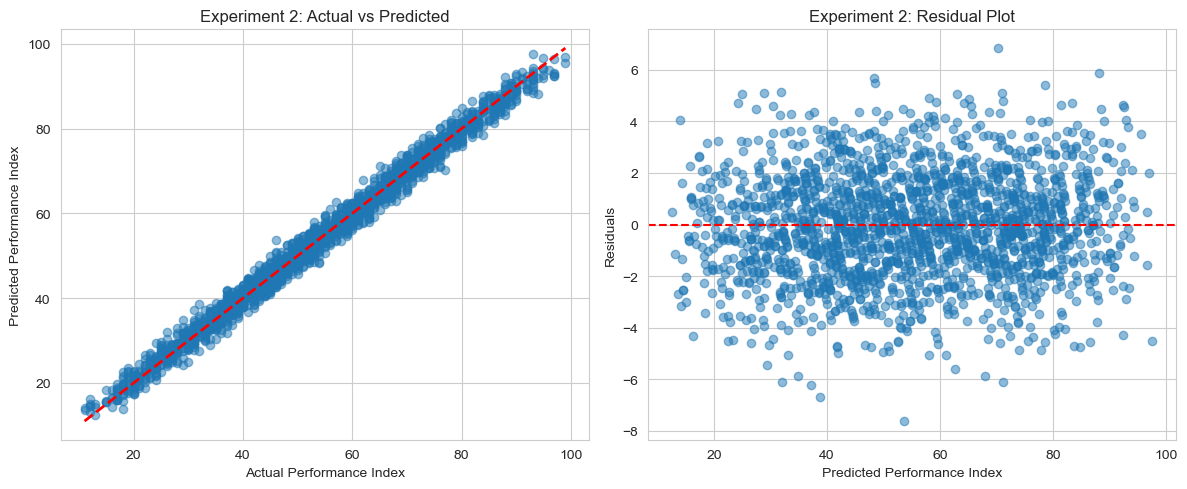

In [23]:
# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(y2_test, y_pred2, alpha=0.5)
axes[0].plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Performance Index')
axes[0].set_ylabel('Predicted Performance Index')
axes[0].set_title('Experiment 2: Actual vs Predicted')

residuals2 = y2_test - y_pred2
axes[1].scatter(y_pred2, residuals2, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Performance Index')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Experiment 2: Residual Plot')

plt.tight_layout()
plt.show()

## EXPERIMENT 3: RIDGE AND LASSO REGRESSION


In [42]:
# Ridge Regression
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X2_train_scaled, y2_train)

y_pred_ridge = ridge.predict(X2_test_scaled)
r2_ridge = r2_score(y2_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y2_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y2_test, y_pred_ridge)

print(f"\nRidge Regression:")
print(f"Best alpha: {ridge.alpha_}")
print(f"R² Score: {r2_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")


Ridge Regression:
Best alpha: 0.01
R² Score: 0.9890
RMSE: 2.0200
MAE: 1.6108


In [43]:
# Lasso Regression
lasso = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso.fit(X2_train_scaled, y2_train)

y_pred_lasso = lasso.predict(X2_test_scaled)
r2_lasso = r2_score(y2_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y2_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y2_test, y_pred_lasso)

print(f"\nLasso Regression:")
print(f"Best alpha: {lasso.alpha_}")
print(f"R² Score: {r2_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")
print(f"MAE: {mae_lasso:.4f}")


Lasso Regression:
Best alpha: 0.001
R² Score: 0.9890
RMSE: 2.0201
MAE: 1.6107


In [27]:
# Feature selection by Lasso
print(f"\nFeatures selected by Lasso: {np.sum(lasso.coef_ != 0)} out of {len(X2.columns)}")
lasso_features = pd.DataFrame({
    'Feature': X2.columns,
    'Coefficient': lasso.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print("\nNon-zero coefficients:")
print(lasso_features[lasso_features['Coefficient'] != 0])


Features selected by Lasso: 10 out of 10

Non-zero coefficients:
                            Feature  Coefficient
1                   Previous Scores    17.706222
0                     Hours Studied     7.173891
3                       Sleep Hours     0.811851
4  Sample Question Papers Practiced     0.419381
2        Extracurricular Activities     0.303523
7                 Total_Preparation     0.174641
8                     Study_Squared     0.089980
9           Previous_Scores_Squared    -0.078328
5                  Study_Efficiency     0.018336
6                  Rest_Study_Ratio    -0.007816


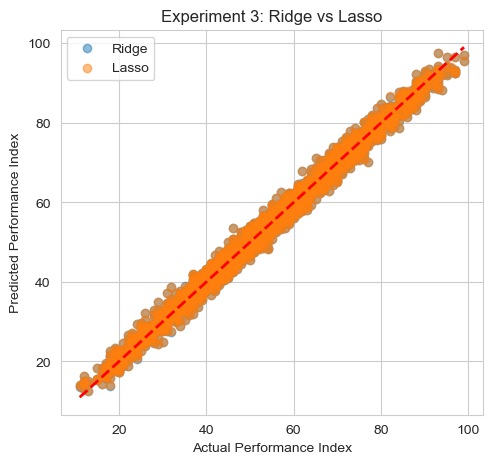

In [28]:
# Comparison plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y2_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.scatter(y2_test, y_pred_lasso, alpha=0.5, label='Lasso')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--', lw=2)
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Experiment 3: Ridge vs Lasso')
plt.legend()

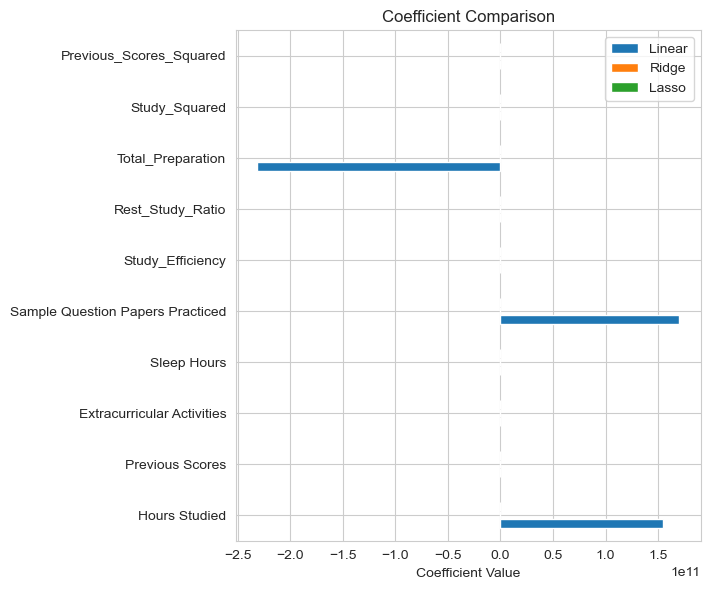

In [29]:
plt.subplot(1, 2, 2)
models = ['Linear', 'Ridge', 'Lasso']
coef_df = pd.DataFrame({
    'Linear': model2.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
}, index=X2.columns)
coef_df.plot(kind='barh', ax=plt.gca())
plt.xlabel('Coefficient Value')
plt.title('Coefficient Comparison')
plt.tight_layout()

plt.show()

## Model Comparison

In [45]:
results = pd.DataFrame({
    'Model': ['Baseline', 'Feature Engineering', 'Ridge', 'Lasso'],
    'R² Score': [r2_1, r2_2, r2_ridge, r2_lasso],
    'RMSE': [rmse_1, rmse_2, rmse_ridge, rmse_lasso],
    'MAE': [mae_1, mae_2, mae_ridge, mae_lasso]
})

print(results.to_string(index=False))

              Model  R² Score     RMSE      MAE
           Baseline  0.988983 2.020552 1.611121
Feature Engineering  0.988988 2.020089 1.610743
              Ridge  0.988989 2.019996 1.610759
              Lasso  0.988988 2.020139 1.610706


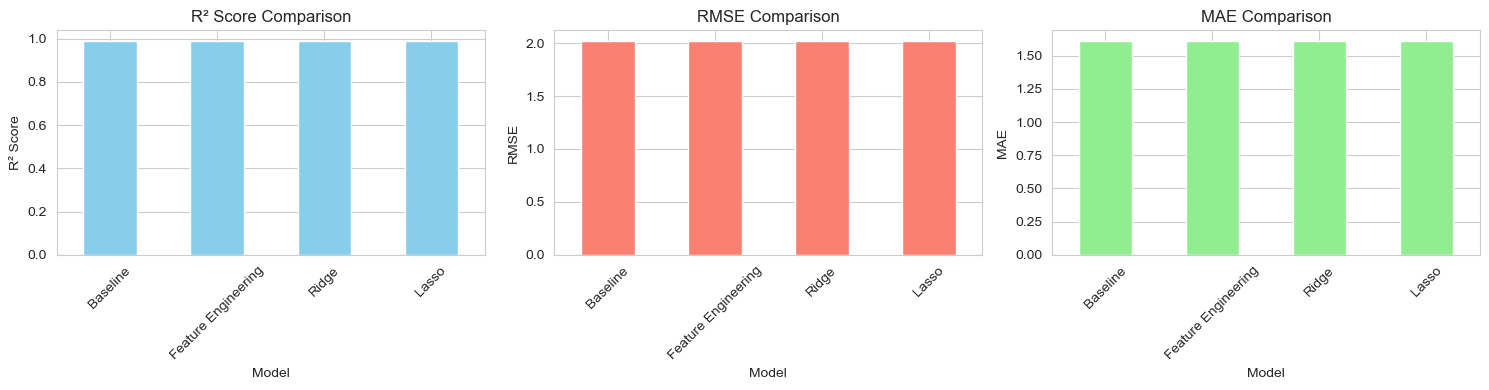

In [31]:
# Comparison bar chart
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

results.plot(x='Model', y='R² Score', kind='bar', ax=axes[0], legend=False, color='skyblue')
axes[0].set_ylabel('R² Score')
axes[0].set_title('R² Score Comparison')
axes[0].tick_params(axis='x', rotation=45)

results.plot(x='Model', y='RMSE', kind='bar', ax=axes[1], legend=False, color='salmon')
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE Comparison')
axes[1].tick_params(axis='x', rotation=45)

results.plot(x='Model', y='MAE', kind='bar', ax=axes[2], legend=False, color='lightgreen')
axes[2].set_ylabel('MAE')
axes[2].set_title('MAE Comparison')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [46]:
print("\nThe 3 experiments have been completed!")
print("\nBest model based on test R²:", results.loc[results['R² Score'].idxmax(), 'Model'])


The 3 experiments have been completed!

Best model based on test R²: Ridge
